In [1]:
import requests
from BeautifulSoup import BeautifulSoup # XML
import re
import pandas as pd

In [2]:
def scrap_page(cityCode, sggCityCode = '-1'):
    print "fetching " , cityCode, sggCityCode
        
    target_url = 'http://info.nec.go.kr/electioninfo/electionInfo_report.xhtml?electionId=0020160413&requestURI=%2FWEB-INF%2Fjsp%2Felectioninfo%2F0020160413%2Fvc%2Fvccp09.jsp&topMenuId=VC&secondMenuId=VCCP09&menuId=VCCP09&statementId=VCCP09_%232&electionCode=2&cityCode='+ cityCode + '&sggCityCode='+ sggCityCode +'&proportionalRepresentationCode=-1&townCode=-1&sggTownCode=-1'
    r = requests.get(target_url)# your code here. Get requests for the given URL.
    
    return r.text

In [3]:
column_index = ['city', 'sggCity', 'sggCityName', 'party', 'sex', 'age', 'school', 'percent', 'rank','win']

In [4]:
def parsing(cityCode):
    html = scrap_page(cityCode)
    soup = BeautifulSoup(html)
    

    table = soup.find('table')
    rows = table.findAll('tr')

    df = pd.DataFrame([], columns=column_index)
    nameRows = []
    for i in range(1,len(rows)):
        if not rows[i].find('td').text == '':
            nameRows.append(i)

    for i in nameRows :
        rowOfName = rows[i].findAll('td')
        rowOfPercent = rows[i+1].findAll('td')

        for j in range(4,14):
            try:
                name = str(rowOfName[j]).split('<br />')[1].split('</strong></td>')[0]
                if not name == '':
                    party = str(rowOfName[j]).split('<br />')[0].split('<strong>')[1]
                    
                    if party =='새누리당' :
                        party = 1
                    elif party =='더불어민주당' :
                        party = 2
                    elif party =='국민의당' :
                        party = 3
                    elif party =='정의당' :
                        party = 4
                    elif party =='무소속' :
                        party = 5
                    elif party == '노동당' :
                        party = 14
                    elif party == '녹색당' :
                        party = 15
                    elif party == '민중연합당' :
                        party = 16
                    elif party == '친반통일당' :
                        party = 18
                    else : party = 9
                    
                    percent = float(rowOfPercent[j].text.split('(')[1].split(')')[0])
                    sggCityName = rowOfName[0].text
                    sggCity = int(cityCodes[cityCode][sggCityName.encode('utf-8')])
                    
                    newRow = pd.DataFrame([[int(cityCode) ,sggCity, sggCityName, int(party), -1, 0.0, -1,float(percent), -1,-1]], columns=column_index, index=[name])
                    df = df.append(newRow)
            except:
                pass
    return df

In [5]:
cityCodes={}
cityCodes['1100']={'종로구' : 2110101,'중구성동구갑' : 2110402,'중구성동구을' : 2110201,'용산구' : 2110301,'광진구갑' : 2110501,'광진구을' : 2110502,'동대문구갑' : 2110601,'동대문구을' : 2110602,'중랑구갑' : 2110701,'중랑구을' : 2110702,'성북구갑' : 2110801,'성북구을' : 2110802,'강북구갑' : 2110901,'강북구을' : 2110902,'도봉구갑' : 2111001,'도봉구을' : 2111002,'노원구갑' : 2111101,'노원구을' : 2111102,'노원구병' : 2111103,'은평구갑' : 2111201,'은평구을' : 2111202,'서대문구갑' : 2111301,'서대문구을' : 2111302,'마포구갑' : 2111401,'마포구을' : 2111402,'양천구갑' : 2111501,'양천구을' : 2111502,'강서구갑' : 2111601,'강서구을' : 2111602,'강서구병' : 2111603,'구로구갑' : 2111701,'구로구을' : 2111702,'금천구' : 2111801,'영등포구갑' : 2111901,'영등포구을' : 2111902,'동작구갑' : 2112001,'동작구을' : 2112002,'관악구갑' : 2112101,'관악구을' : 2112102,'서초구갑' : 2112201,'서초구을' : 2112202,'강남구갑' : 2112301,'강남구을' : 2112302,'강남구병' : 2112303,'송파구갑' : 2112401,'송파구을' : 2112402,'송파구병' : 2112403,'강동구갑' : 2112501,'강동구을' : 2112502}
cityCodes['2600']={'중구영도구' : 2260401,'서구동구' : 2260201,'부산진구갑' : 2260501,'부산진구을' : 2260502,'동래구' : 2260601,'남구갑' : 2260701,'남구을' : 2260702,'북구강서구갑' : 2260801,'북구강서구을' : 2261301,'해운대구갑' : 2260902,'해운대구을' : 2260903,'사하구갑' : 2261101,'사하구을' : 2261102,'금정구' : 2261201,'연제구' : 2261401,'수영구' : 2261501,'사상구' : 2261601,'기장군' : 2261002}
cityCodes['2700']={'중구남구' : 2270101,'동구갑' : 2270201,'동구을' : 2270202,'서구' : 2270301,'북구갑' : 2270501,'북구을' : 2270502,'수성구갑' : 2270601,'수성구을' : 2270602,'달서구갑' : 2270701,'달서구을' : 2270702,'달서구병' : 2270703,'달성군' : 2270801}
cityCodes['2800']={'중구동구강화군옹진군' : 2280101,'남구갑' : 2280301,'남구을' : 2280302,'연수구갑' : 2280402,'연수구을' : 2280403,'남동구갑' : 2280501,'남동구을' : 2280502,'부평구갑' : 2280601,'부평구을' : 2280602,'계양구갑' : 2280701,'계양구을' : 2280702,'서구갑' : 2280802,'서구을' : 2280803}
cityCodes['2900']={'동구남구갑' : 2290302,'동구남구을' : 2290101,'서구갑' : 2290201,'서구을' : 2290202,'북구갑' : 2290401,'북구을' : 2290402,'광산구갑' : 2290501,'광산구을' : 2290502}
cityCodes['3000']={'동구' : 2300101,'중구' : 2300201,'서구갑' : 2300301,'서구을' : 2300302,'유성구갑' : 2300402,'유성구을' : 2300403,'대덕구' : 2300501}
cityCodes['3100']={'중구' : 2310101,'남구갑' : 2310201,'남구을' : 2310202,'동구' : 2310301,'북구' : 2310401,'울주군' : 2310501}
cityCodes['5100']={'세종특별자치시' : 2510101}
cityCodes['4100']={'수원시갑' : 2410101,'수원시을' : 2410201,'수원시병' : 2410301,'수원시정' : 2410401,'수원시무' : 2410202,'성남시수정구' : 2410501,'성남시중원구' : 2410601,'성남시분당구갑' : 2410701,'성남시분당구을' : 2410702,'의정부시갑' : 2410801,'의정부시을' : 2410802,'안양시만안구' : 2410901,'안양시동안구갑' : 2411001,'안양시동안구을' : 2411002,'부천시원미구갑' : 2411101,'부천시원미구을' : 2411102,'부천시소사구' : 2411201,'부천시오정구' : 2411301,'광명시갑' : 2411401,'광명시을' : 2411402,'평택시갑' : 2411501,'평택시을' : 2411502,'동두천시연천군' : 2411701,'안산시상록구갑' : 2411801,'안산시상록구을' : 2411802,'안산시단원구갑' : 2411901,'안산시단원구을' : 2411902,'고양시갑' : 2412001,'고양시을' : 2412002,'고양시병' : 2412101,'고양시정' : 2412201,'의왕시과천시' : 2412301,'구리시' : 2412501,'남양주시갑' : 2412601,'남양주시을' : 2412602,'남양주시병' : 2412603,'오산시' : 2412701,'시흥시갑' : 2412901,'시흥시을' : 2412902,'군포시갑' : 2413002,'군포시을' : 2413003,'하남시' : 2413101,'용인시갑' : 2413501,'용인시을' : 2413701,'용인시병' : 2413602,'용인시정' : 2413702,'파주시갑' : 2413202,'파주시을' : 2413203,'이천시' : 2413401,'안성시' : 2413801,'김포시갑' : 2413902,'김포시을' : 2413903,'화성시갑' : 2412801,'화성시을' : 2412802,'화성시병' : 2412803,'광주시갑' : 2414002,'광주시을' : 2414003,'양주시' : 2411602,'포천시가평군' : 2414102,'여주시양평군' : 2413301}
cityCodes['4200']={'춘천시' : 2420101,'원주시갑' : 2420202,'원주시을' : 2420203,'강릉시' : 2420301,'동해시삼척시' : 2420401,'태백시횡성군영월군평창군정선군' : 2421401,'속초시고성군양양군' : 2420801,'홍천군철원군화천군양구군인제군' : 2421601}
cityCodes['4300']={'청주시상당구' : 2430101,'청주시서원구' : 2430201,'청주시흥덕구' : 2430202,'청주시청원구' : 2430601,'충주시' : 2430301,'제천시단양군' : 2430401,'보은군옥천군영동군괴산군' : 2430701,'증평군진천군음성군' : 2431002}
cityCodes['4400']={'천안시갑' : 2440101,'천안시을' : 2440102,'천안시병' : 2440103,'공주시부여군청양군' : 2440202,'보령시서천군' : 2440301,'아산시갑' : 2440402,'아산시을' : 2440403,'서산시태안군' : 2440501,'논산시계룡시금산군' : 2440901,'당진시' : 2441601,'홍성군예산군' : 2441301}
cityCodes['4500']={'전주시갑' : 2450101,'전주시을' : 2450102,'전주시병' : 2450201,'군산시' : 2450301,'익산시갑' : 2450501,'익산시을' : 2450502,'정읍시고창군' : 2450701,'남원시임실군순창군' : 2450801,'김제시부안군' : 2450902,'완주군진안군무주군장수군' : 2451001}
cityCodes['4600']={'목포시' : 2460101,'여수시갑' : 2460201,'여수시을' : 2460202,'순천시' : 2460403,'나주시화순군' : 2460601,'광양시곡성군구례군' : 2460702,'담양군함평군영광군장성군' : 2462202,'고흥군보성군장흥군강진군' : 2461201,'해남군완도군진도군' : 2461801,'영암군무안군신안군' : 2462101}
cityCodes['4700']={'포항시북구' : 2470101,'포항시남구울릉군' : 2470201,'경주시' : 2470401,'김천시' : 2470501,'안동시' : 2470601,'구미시갑' : 2470701,'구미시을' : 2470702,'영주시문경시예천군' : 2470801,'영천시청도군' : 2470901,'상주시군위군의성군청송군' : 2471001,'경산시' : 2471302,'영양군영덕군봉화군울진군' : 2472201,'고령군성주군칠곡군' : 2471701}
cityCodes['4800']={'창원시의창구' : 2480101,'창원시성산구' : 2480102,'창원시마산합포구' : 2480201,'창원시마산회원구' : 2480202,'창원시진해구' : 2480401,'진주시갑' : 2480301,'진주시을' : 2480302,'통영시고성군' : 2480501,'사천시남해군하동군' : 2480702,'김해시갑' : 2480801,'김해시을' : 2480802,'밀양시의령군함안군창녕군' : 2480901,'거제시' : 2481001,'양산시갑' : 2481402,'양산시을' : 2481403,'산청군함양군거창군합천군' : 2481901}
cityCodes['4900']={'제주시갑' : 2490101,'제주시을' : 2490102,'서귀포시' : 2490201}

In [6]:
df = pd.DataFrame([], columns=column_index)
for cityCode in cityCodes.keys():
    rslt = parsing(cityCode)
    df= df.append(rslt)

fetching  4800 -1
fetching  2900 -1
fetching  2600 -1
fetching  4200 -1
fetching  4700 -1
fetching  4400 -1
fetching  3100 -1
fetching  2700 -1
fetching  4100 -1
fetching  4300 -1
fetching  3000 -1
fetching  1100 -1
fetching  4900 -1
fetching  2800 -1
fetching  5100 -1
fetching  4600 -1
fetching  4500 -1


In [62]:
df

,city,sggCity,sggCityName,party,sex,age,school,percent,rank,win
박완수,4800.0,2480101.0,창원시의창구,1.0,0.0,60.0,2.0,56.61,1.0,-1.0
김기운,4800.0,2480101.0,창원시의창구,2.0,0.0,56.0,1.0,40.53,2.0,-1.0
한경수,4800.0,2480101.0,창원시의창구,9.0,0.0,51.0,1.0,2.85,3.0,-1.0
강기윤,4800.0,2480102.0,창원시성산구,1.0,0.0,55.0,2.0,40.21,2.0,-1.0
이재환,4800.0,2480102.0,창원시성산구,3.0,0.0,35.0,1.0,8.27,3.0,-1.0
노회찬,4800.0,2480102.0,창원시성산구,4.0,0.0,59.0,1.0,51.50,1.0,-1.0
이주영,4800.0,2480201.0,창원시마산합포구,1.0,0.0,64.0,1.0,65.25,1.0,-1.0
박남현,4800.0,2480201.0,창원시마산합포구,2.0,0.0,40.0,1.0,29.10,2.0,-1.0
이원희,4800.0,2480201.0,창원시마산합포구,14.0,0.0,39.0,0.0,5.63,3.0,-1.0
윤한홍,4800.0,2480202.0,창원시마산회원구,1.0,0.0,53.0,2.0,47.80,1.0,-1.0


In [8]:
# ranking add
for cityCode in cityCodes.keys():
    for sggCityCode in cityCodes[cityCode].values() :
        sample=df[df.sggCity == sggCityCode]
        sample.loc[:,'ranking'] = sample['percent'].rank(ascending=0)
        for row in range(len(sample)):
                df['rank'][(df.index == sample.index[row]) & (df.sggCity == sggCityCode)] = sample.ranking[row]

C:\Users\HSY\Anaconda2\lib\site-packages\pandas\core\indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\HSY\Anaconda2\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\HSY\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [9]:
for cityCode in cityCodes.keys():
    print 'fetching ' +cityCode
    url='http://info.nec.go.kr/electioninfo/electionInfo_report.xhtml?electionId=0020160413&requestURI=%2FWEB-INF%2Fjsp%2Felectioninfo%2F0020160413%2Fcp%2Fcpri03.jsp&topMenuId=CP&secondMenuId=CPRI03&menuId=CPRI03&statementId=CPRI03_%232&electionCode=2&cityCode='+cityCode+'&sggCityCode=0&proportionalRepresentationCode=-1&townCode=-1&sggTownCode=-1&dateCode=0&x=46&y=8'
    r = requests.get(url)
    html = r.text
    soup = BeautifulSoup(html)
    table = soup.findAll('table',{'class':'table01'})[0]
    tagList = table.findAll('tr')
    rowList = tagList[1:len(tagList)]
    lst_tmp=[]
    for i in range(len(rowList)):
        lst_tmp.append(rowList[i])
    r_area = [row.findAll('td')[6] for row in lst_tmp]
    r_sex = [row.findAll('td')[5] for row in lst_tmp]
    r_name = [row.findAll('td')[4] for row in lst_tmp]
    r_loc= [row.findAll('td')[0] for row in lst_tmp]
    r_school= [row.findAll('td')[9] for row in lst_tmp]
    
    for a in range(len(r_area)) :
        tmp=str(r_area[a])
        tmp=tmp.split('(')
        tmp2=tmp[1]
        tmp2=tmp2.split(')')
        age = float(int(tmp2[0][0])*10+int(tmp2[0][1]))

        tmp3=str(r_name[a])
        tmp3=tmp3.split('<br/>')
        name=tmp3[0].split('\t')
        name=name[11].split('<br />')[0]

        tmp9=str(r_sex[a]).split('>')
        sex=tmp9[1].split('<')[0].strip()
        
        tmp7=str(r_loc[a]).decode('utf-8').split('>')
        sggCity=tmp7[1].split('<')[0]
        sggCity = cityCodes[cityCode][sggCity.encode('utf-8')]
        
        # 학력 정보 입력
        tmps=str(r_school[a]).split('>')
        school=tmps[1].split('<')[0].strip()
        
        schooln=0;
        
        if school.find('대학') >=1:
            if school.find('대학원') >=1 :
                if school.find('석사')>=1 :
                    schooln+=1
                elif school.find('박사')>=1 :
                    schooln+=2
            elif school.find('대학교') >=1 :
                if school.find('졸업') >=1 :
                    schooln+=1
                
        if school.find('서울대')>=1 :
            schooln+=1;
        
        # 성별 정보 입력
        if sex == '남' : sex = 0
        else : sex = 1
        
        try : 
            df['sex'][(df.index == name) & (df.sggCity == sggCity)] = sex
            df['age'][(df.index == name) & (df.sggCity == sggCity)] = age
            df['school'][(df.index == name) & (df.sggCity == sggCity)] = schooln
        except :
            pass

fetching 4800


C:\Users\HSY\Anaconda2\lib\site-packages\ipykernel\__main__.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HSY\Anaconda2\lib\site-packages\ipykernel\__main__.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HSY\Anaconda2\lib\site-packages\ipykernel\__main__.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


fetching 2900
fetching 2600
fetching 4200
fetching 4700
fetching 4400
fetching 3100
fetching 2700
fetching 4100
fetching 4300
fetching 3000
fetching 1100
fetching 4900
fetching 2800
fetching 5100
fetching 4600
fetching 4500


In [11]:
dfPoint.head()

NameError: name 'dfPoint' is not defined

In [12]:
dfPoint=pd.DataFrame.from_csv('C:/data/trend/all.csv', encoding ='euc-kr')

In [13]:
length = len(dfPoint)
dfPoint['city'] = [-1]*length
dfPoint['party'] = [-1]*length
dfPoint['sex']= [-1]*length
dfPoint['age'] = [-1]*length
dfPoint['school'] = [-1]*length
dfPoint['percent'] = [-1.0]*length
dfPoint['rank'] = [-1]*length
dfPoint['win'] = [-1]*length

In [14]:
errDf = pd.DataFrame([], columns=['name', 'sggCity'])
for row in range(len(dfPoint)) :
    sggCityName = dfPoint.ix[row]['sggCity']
    name = dfPoint.ix[row].name
    try:
        index = (df.index == name.encode('utf-8')) & (df['sggCityName'] == unicode(sggCityName))
        dfPoint.ix[row,'city'] = int(df['city'][index][0])
        dfPoint.ix[row,'sggCity'] = int(cityCodes[str(int(dfPoint.ix[row,'city']))][sggCityName.encode('utf-8')])
        dfPoint.ix[row,'party'] = int(df['party'][index][0])
        dfPoint.ix[row,'sex'] = int(df['sex'][index][0])
        dfPoint.ix[row,'age'] = int(df['age'][index][0])
        dfPoint.ix[row,'school'] = int(df['school'][index][0])
        dfPoint.ix[row,'queryPoint'] = int(dfPoint.ix[row,'queryPoint'])
        dfPoint.ix[row,'percent'] = float(df['percent'][index][0])
        dfPoint.ix[row,'rank'] = int(df['rank'][index][0])
        if dfPoint.ix[row,'rank'] ==1 : dfPoint.ix[row,'win'] = 1
        else :dfPoint.ix[row,'win'] = 0
    except :
        errDf.append([name, sggCity])
        newRow = pd.DataFrame([[name, sggCity]], columns=['name', 'sggCity'])
        errDf = errDf.append(newRow)
        pass
dfPoint.head()

,sggCity,queryPoint,city,party,sex,age,school,percent,rank,win
name,,,,,,,,,,
박종희,2410101,58,4100,1,0,55,1,37.40,2,0
이찬열,2410101,100,4100,2,0,56,1,47.42,1,1
김재귀,2410101,21,4100,3,0,62,0,15.17,3,0
김상민,2410201,100,4100,1,0,42,1,36.97,2,0
백혜련,2410201,42,4100,2,1,49,1,47.14,1,1


In [71]:
for i in range(len(dfPoint)):
    if dfPoint['rank'][i]>3:
        dfPoint['rank'][i] =3

In [61]:
dfPoint

,sggCity,queryPoint,city,party,sex,age,school,percent,rank,win
name,,,,,,,,,,
박종희,2410101,58,4100,1,0,55,1,37.40,2,0
이찬열,2410101,100,4100,2,0,56,1,47.42,1,1
김재귀,2410101,21,4100,3,0,62,0,15.17,3,0
김상민,2410201,100,4100,1,0,42,1,36.97,2,0
백혜련,2410201,42,4100,2,1,49,1,47.14,1,1
이대의,2410201,4,4100,3,0,67,1,13.88,3,0
김용남,2410301,100,4100,1,0,46,1,46.06,2,0
김영진,2410301,78,4100,2,0,48,1,53.93,1,1
박수영,2410401,39,4100,1,0,52,1,31.37,2,0


In [17]:
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np

predict percent

In [72]:
mtx=dfPoint.as_matrix()

In [73]:
# Create Train, CV, Test
def split_dataset(data, ratio=(.6, .2, .2), shuffle=False, rank=False):
    if sum(ratio) != 1.:
        print "Invalid data split ratio", ratio
        return
    if shuffle :
        data = data.sample(frac=1).reset_index(drop=True)
    X = data[:,range(7)]
    if rank : Y = data[:,8]
    else : Y = data[:,7]
    
    x_train, x_tmp, y_train, y_tmp = train_test_split(X, Y, test_size=0.4)
    x_cv, x_test, y_cv, y_test = train_test_split(x_tmp, y_tmp, test_size=0.5)
    
    return (x_train, x_cv, x_test, y_train, y_cv, y_test)

In [74]:
def split_dataset_NoCV(data, ratio=(.8, .2), shuffle=False, rank=False):
    if sum(ratio) != 1.:
        print "Invalid data split ratio", ratio
        return
    if shuffle :
        data = data.sample(frac=1).reset_index(drop=True)
    X = data[:,range(7)]
    if rank : Y = data[:,8]
    else : Y = data[:,7]
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    return (x_train, x_test, y_train, y_test)

In [75]:
def split_dataset_NoCV_win(data, ratio=(.8, .2), shuffle=False, rank=False):
    if sum(ratio) != 1.:
        print "Invalid data split ratio", ratio
        return
    if shuffle :
        data = data.sample(frac=1).reset_index(drop=True)
    X = data[:,range(7)]
    if rank : Y = data[:,8]
    else : Y = data[:,9]
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    return (x_train, x_test, y_train, y_test)

In [76]:
(x_train, x_cv, x_test, y_train, y_cv, y_test) = split_dataset(mtx, rank=True)
print "Train set: " , len(x_train)
print "CV set    : ", len(x_cv)
print "Test set : ", len(x_test)

Train set:  432
CV set    :  144
Test set :  144


In [77]:
(x_train_rank, x_test_rank,y_train_rank,y_test_rank) = split_dataset_NoCV(mtx, rank=True)
(x_train_win, x_test_win,y_train_win,y_test_win) = split_dataset_NoCV_win(mtx, rank=False)

predict rank

In [78]:
from sklearn import tree
from sklearn import cross_validation
from sklearn import svm
from sklearn.cross_validation import KFold

In [79]:
type(y_train)

y_train_rank_dt = np.asarray(y_train_rank, dtype="|S6")
y_test_rank_dt = np.asarray(y_test_rank, dtype="|S6")

y_train_win_dt = np.asarray(y_train_win, dtype="|S6")
y_test_win_dt = np.asarray(y_test_win, dtype="|S6")

In [85]:
score_dt = clf.score(x_test_win,y_test_win_dt)
score_dt

0.85416666666666663

In [107]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(x_train_win, y_train_win_dt)

print clf.score(x_test_win, y_test_win_dt)
pd.DataFrame({'win': y_test_win_dt, 'predict': clf.predict(x_test_win)})
#print clf.score(x_test,y_test)

0.868055555556


,predict,win
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [60]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(x_train_rank, y_train_rank_dt)

print clf.score(x_test_rank, y_test_rank_dt)
pd.DataFrame({'rank': y_test_rank_dt, 'predict': clf.predict(x_test_rank)})
#print clf.score(x_test,y_test)

0.743055555556


,predict,rank
0,1,2
1,2,2
2,1,1
3,2,2
4,3,3
5,1,2
6,2,1
7,1,1
8,1,1
9,1,1


In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_2D_lr(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)        
    
    plt.show()

In [102]:
from sklearn import linear_model
from sklearn import cross_validation
import numpy as np
from sklearn import datasets

In [100]:
mtx = dfPoint.as_matrix()

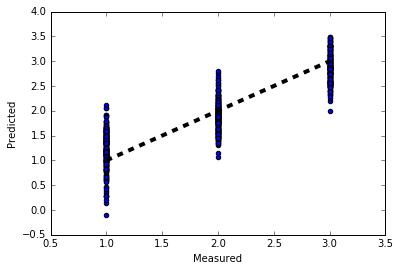

Accuracy: 0.80 (+/- 0.05)


,percent,predict
0,2,1.787957
1,1,1.254292
2,3,2.754915
3,2,1.656033
4,1,1.383526


In [105]:
lr = linear_model.LinearRegression()
predicted = cross_validation.cross_val_predict(lr, mtx[:,:-2], mtx[:,-2], cv=5)

fig, ax = plt.subplots()
ax.scatter(mtx[:,-2], predicted)
ax.plot([mtx[:,-2].min(), mtx[:,-2].max()], [mtx[:,-2].min(), mtx[:,-2].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
scores = cross_validation.cross_val_score(lr, mtx[:,:-2], mtx[:,-2], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
pd.DataFrame({'percent': mtx[:,-2], 'predict': predicted}).head()

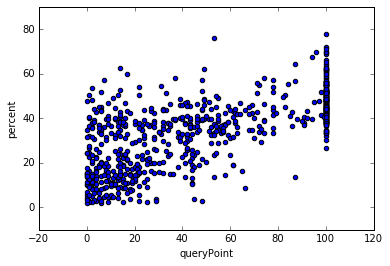

In [57]:
plot_2D_lr(dfPoint.queryPoint, dfPoint.percent, x_label='queryPoint', y_label='percent')

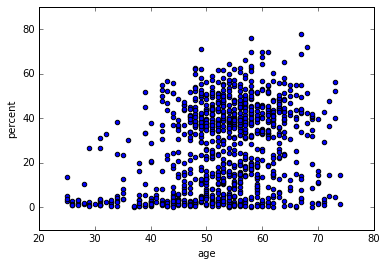

In [58]:
plot_2D_lr(df.age, df.percent, x_label='age', y_label='percent')

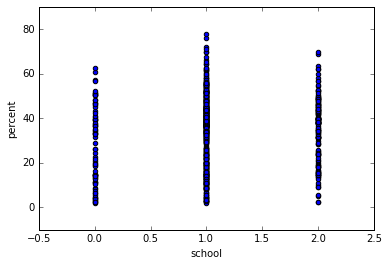

In [70]:
plot_2D_lr(dfPoint.school, dfPoint.percent, x_label='school', y_label='percent')

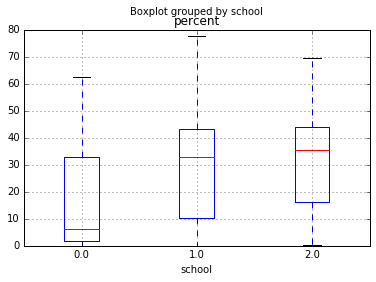

In [60]:
df.boxplot(column='percent',by='school')

In [61]:
byshool = df.groupby('school')
byshool['percent'].describe()

school       
0.0     count    149.000000
        mean      15.975168
        std       18.020312
        min        0.070000
        25%        1.950000
        50%        6.160000
        75%       32.750000
        max       62.670000
1.0     count    610.000000
        mean      28.470311
        std       18.872226
        min        0.060000
        25%       10.380000
        50%       32.830000
        75%       43.440000
        max       77.650000
2.0     count    174.000000
        mean      31.311552
        std       17.156084
        min        0.250000
        25%       16.112500
        50%       35.600000
        75%       43.842500
        max       69.620000
dtype: float64

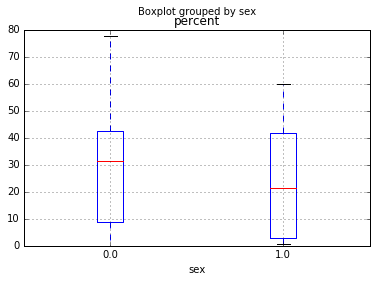

In [62]:
df.boxplot(column='percent',by='sex')

In [63]:
bysex = df.groupby('sex')
bysex['percent'].describe()

sex       
0.0  count    835.000000
     mean      27.514970
     std       18.891668
     min        0.060000
     25%        8.810000
     50%       31.370000
     75%       42.575000
     max       77.650000
1.0  count     98.000000
     mean      22.657143
     std       20.006452
     min        0.690000
     25%        2.755000
     50%       21.535000
     75%       41.885000
     max       60.090000
dtype: float64

In [64]:
from pybrain.datasets            import ClassificationDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer
from pybrain.tools.xml.networkwriter import NetworkWriter
from pybrain.tools.xml.networkreader import NetworkReader
from pybrain.datasets import SupervisedDataSet